In [153]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [154]:
df = pd.read_excel('concrete_strength/Concrete_Data.xls')

In [155]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement (component 1)(kg in a m^3 mixture)                1030 non-null float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    1030 non-null float64
Fly Ash (component 3)(kg in a m^3 mixture)               1030 non-null float64
Water  (component 4)(kg in a m^3 mixture)                1030 non-null float64
Superplasticizer (component 5)(kg in a m^3 mixture)      1030 non-null float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     1030 non-null float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        1030 non-null float64
Age (day)                                                1030 non-null int64
Concrete compressive strength(MPa, megapascals)          1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [157]:
df.columns = ['Cement', 'Slag','Fly Ash', 'Water','Superplasticizer','Coarse','Fine','Age','Strength']

In [158]:
df.columns

Index(['Cement', 'Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse',
       'Fine', 'Age', 'Strength'],
      dtype='object')

In [159]:
df.head()

,Cement,Slag,Fly Ash,Water,Superplasticizer,Coarse,Fine,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [160]:
df.isnull().sum()

Cement              0
Slag                0
Fly Ash             0
Water               0
Superplasticizer    0
Coarse              0
Fine                0
Age                 0
Strength            0
dtype: int64

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement              1030 non-null float64
Slag                1030 non-null float64
Fly Ash             1030 non-null float64
Water               1030 non-null float64
Superplasticizer    1030 non-null float64
Coarse              1030 non-null float64
Fine                1030 non-null float64
Age                 1030 non-null int64
Strength            1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


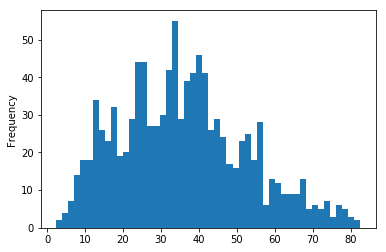

In [162]:
df.Strength.plot(kind='hist', bins=50)

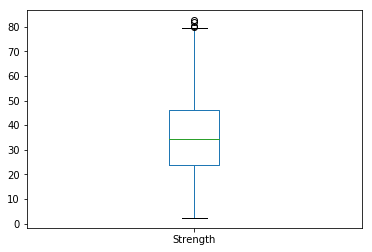

In [163]:
df.Strength.plot(kind='box')

In [164]:
df.describe()

,Cement,Slag,Fly Ash,Water,Superplasticizer,Coarse,Fine,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [165]:
target ='Strength'
features = set(df.columns)-set([target])

In [166]:
x_train, x_test, y_train, y_test = train_test_split(df.loc[:, features], df.loc[:, target], test_size=0.2)

In [167]:
from sklearn import preprocessing
x_train_f = preprocessing.scale(x_train)
x_test_f = preprocessing.scale(x_test)

In [168]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [169]:
linreg.fit(x_train_f, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [170]:
linreg.score(x_test_f, y_test)

0.61701882083983062

In [171]:
linreg.coef_

array([  9.02562227,  12.18746272,   5.25181563,   1.55340739,
         7.17348547,   1.35891528,   2.02833144,  -3.18424226])

In [172]:
y_predict = linreg.predict(x_test_f)
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test, y_predict)

90.410445941073931

In [173]:
linreg.coef_

array([  9.02562227,  12.18746272,   5.25181563,   1.55340739,
         7.17348547,   1.35891528,   2.02833144,  -3.18424226])